In [ ]:
%load_ext autoreload
%autoreload 2

# Testing train_model
The purpose of this notebook is to test the functionality of the `train_model` function in the `training.py` script.

## Imports

In [2]:
from functools import partial

import jax
import jax.numpy as jnp
from jax import random
from flax import linen as nn
from modularRNN.model import CTRNNCell
from modularRNN.task import ModularArithmeticTask
from modularRNN.training import create_train_state, compute_custom_accuracy, train_model

import matplotlib.pyplot as plt

In [3]:
key = random.PRNGKey(0)

## Create testing and training datasets

In [4]:
key, subkey = random.split(key)
training_trials = 3200
testing_trials = 320
train_batch_size = 128
mod_set = jnp.array([5])
pulse_distribution = partial(random.poisson, lam=8)
trial_length = 100

modtask = ModularArithmeticTask(
    subkey, 
    training_trials, 
    testing_trials, 
    train_batch_size, 
    mod_set, 
    pulse_distribution, 
    trial_length, 
)
training_dataset, testing_dataset = modtask.tf_datasets()

100%|███████████████████████████████████████| 320/320 [00:00<00:00, 1001.74it/s]


## Create CT-RNN

In [5]:
features = 100
alpha = jnp.float32(0.1)
noise = jnp.float32(0.05)
out_shape = 10

ctrnn = nn.RNN(CTRNNCell(features=features, alpha=alpha, noise=noise, out_shape=out_shape,))

## Train CT-RNN

In [6]:
lr = 0.01
weight_decay = 0.0001
l2_penalty = 0.0001
epochs = 500

In [7]:
key, subkey = random.split(key)
state = create_train_state(ctrnn, subkey, lr, weight_decay, trial_length)

In [8]:
key, subkey = random.split(key)
results = train_model(
    subkey, 
    state, 
    training_dataset, 
    testing_dataset, 
    epochs,
    l2_penalty,
)

2024-04-06 00:04:11.110238: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:04:13.668154: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:04:15.967529: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:04:18.049982: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:04:20.099147: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:04:22.162323: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:04:24.243501: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 50:
train_loss: 0.06994636356830597
test_loss: 0.06943368166685104




2024-04-06 00:05:56.612371: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:05:58.666468: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:06:00.680109: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:06:02.724581: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:06:04.752577: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:06:06.792557: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:06:08.832955: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 100:
train_loss: 0.05916291102766991
test_loss: 0.05844639241695404




2024-04-06 00:07:38.816492: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:07:40.889926: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:07:42.940785: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:07:44.989458: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:07:47.026980: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:07:49.000426: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:07:51.092562: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 150:
train_loss: 0.05492470785975456
test_loss: 0.05399301275610924




2024-04-06 00:09:21.239174: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:09:23.284671: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:09:25.360216: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:09:27.380336: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:09:29.437354: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:09:31.493105: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:09:33.560624: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 200:
train_loss: 0.03897332772612572
test_loss: 0.038669440895318985




2024-04-06 00:11:03.942985: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:11:06.002734: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:11:08.037095: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:11:10.072353: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:11:12.117426: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:11:14.191976: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:11:16.156375: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 250:
train_loss: 0.05442064628005028
test_loss: 0.053198933601379395




2024-04-06 00:12:46.753915: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:12:48.833903: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:12:50.920360: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:12:53.020092: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:12:55.064916: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:12:57.151962: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:12:59.210708: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 300:
train_loss: 0.034132905304431915
test_loss: 0.032581496983766556




2024-04-06 00:14:31.071901: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:14:33.145500: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:14:35.171475: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:14:37.230980: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:14:39.337246: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:14:41.419837: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:14:43.463421: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 350:
train_loss: 0.017193127423524857
test_loss: 0.015036779455840588




2024-04-06 00:16:14.605420: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:16:16.682657: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:16:18.737742: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:16:20.829698: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:16:22.880752: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:16:24.935849: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:16:26.996775: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 400:
train_loss: 0.016833283007144928
test_loss: 0.011931832879781723




2024-04-06 00:17:58.628595: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:18:00.664427: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:18:02.758966: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:18:04.822587: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:18:06.912730: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:18:08.963436: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:18:11.189677: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 450:
train_loss: 0.06006002426147461
test_loss: 0.057354073971509933




2024-04-06 00:19:41.837717: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:19:43.880517: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:19:45.895779: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:19:47.974596: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:19:50.042401: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:19:52.133741: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-06 00:19:54.701365: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 500:
train_loss: 0.006535591557621956
test_loss: 0.007577199954539537




2024-04-06 00:21:23.581828: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Test CT-RNN

In [9]:
for _inputs, _outputs in testing_dataset.as_numpy_iterator():
    pass

2024-04-06 00:21:23.803355: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [10]:
key, subkey = random.split(key)
z_0, rates_0 = ctrnn.apply(results["min_test_loss_params"].params, _inputs, init_key=subkey,)

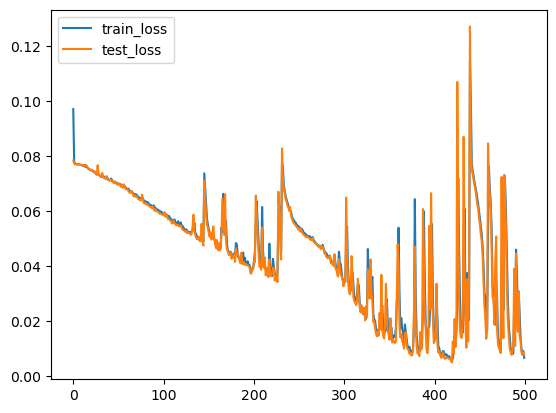

In [11]:
plt.plot(results['metrics_history'].history['train_loss'], label='train_loss')
plt.plot(results['metrics_history'].history['test_loss'], label='test_loss')
plt.legend()
plt.show()

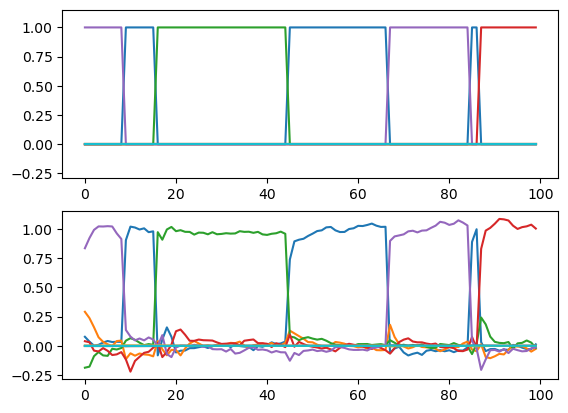

In [12]:
fig, axs = plt.subplots(2, 1, sharey=True)

axs[0].plot(_outputs[0,:,:])
axs[1].plot(z_0[0,:,:])

plt.show()

In [13]:
results['metrics_history'].save_to_csv('../data/script_tests/metrics_history.csv')

## Test compute_custom_accuracy

In [14]:
accuracy = compute_custom_accuracy(_outputs, z_0,)
accuracy

Array(0.98168755, dtype=float32)

## Test trial_length variable

In [15]:
key, subkey = random.split(key)
training_trials = 640
testing_trials = 640
train_batch_size = 640
mod_set = jnp.array([5])
pulse_distribution = partial(random.poisson, lam=16)
trial_length = 500

modtask = ModularArithmeticTask(
    subkey, 
    training_trials, 
    testing_trials, 
    train_batch_size, 
    mod_set, 
    pulse_distribution, 
    trial_length, 
)
training_dataset, testing_dataset = modtask.tf_datasets()

100%|████████████████████████████████████████| 640/640 [00:00<00:00, 660.49it/s]


2024-04-06 00:21:28.965724: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


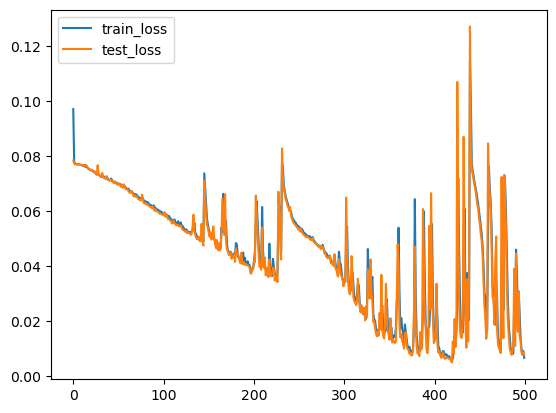

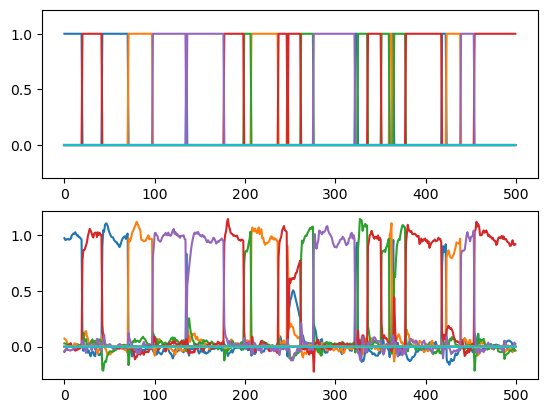

Array(0.98658437, dtype=float32)

In [16]:
for _inputs, _outputs in testing_dataset.as_numpy_iterator():
    pass

key, subkey = random.split(key)
z_0, rates_0 = ctrnn.apply(results["min_test_loss_params"].params, _inputs, init_key=subkey,)

plt.plot(results['metrics_history'].history['train_loss'], label='train_loss')
plt.plot(results['metrics_history'].history['test_loss'], label='test_loss')
plt.legend()
plt.show()

fig, axs = plt.subplots(2, 1, sharey=True)

axs[0].plot(_outputs[0,:,:])
axs[1].plot(z_0[0,:,:])

plt.show()

accuracy = compute_custom_accuracy(_outputs, z_0,)
accuracy